In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-and-alcohol-consumption/HappinessAlcoholConsumption.csv


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [124]:
df = pd.read_csv("/kaggle/input/happiness-and-alcohol-consumption/HappinessAlcoholConsumption.csv")

# Data Preparations

In [125]:
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [126]:
df.shape

(122, 9)

In [127]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [128]:
pd.DataFrame(dict(df['Region'].value_counts()).items(), columns = ['Region','Numbers'])

,Region,Numbers
0,Sub-Saharan Africa,28
1,Central and Eastern Europe,27
2,Latin America and Caribbean,23
3,Western Europe,20
4,Middle East and Northern Africa,11
5,Southeastern Asia,5
6,Eastern Asia,4
7,Australia and New Zealand,2
8,North America,2


In [129]:
df.columns


Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'],
      dtype='object')

**Highlighting the maixmum values of each attribute in the data set**

In [130]:
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'])

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526000,928,53.579000,224,81,278
1,Switzerland,Western Europe,north,7.509000,943,79.866000,185,100,280
2,Iceland,Western Europe,north,7.501000,933,60.530000,233,61,78
3,Norway,Western Europe,north,7.498000,951,70.890000,169,71,129
4,Finland,Western Europe,north,7.413000,918,43.433000,263,133,97
5,Canada,North America,north,7.404000,922,42.349000,240,122,100
6,Netherlands,Western Europe,north,7.339000,928,45.638000,251,88,190
7,New Zealand,Australia and New Zealand,south,7.334000,915,40.332000,203,79,175
8,Australia,Australia and New Zealand,south,7.313000,938,49.897000,261,72,212
9,Sweden,Western Europe,north,7.291000,932,51.845000,152,60,186


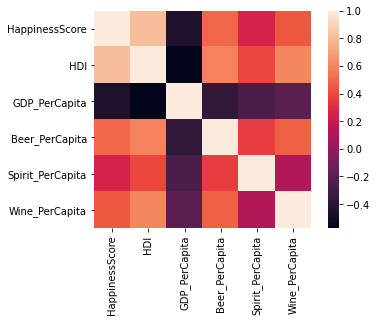

In [131]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

This is a correlation plot for the features. We can see that GDP_PerCapita is inversely proportional to all the other features. Let's drop GDP_PerCapita and observe the Correlation table again.

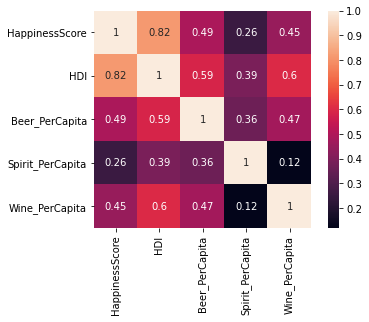

In [132]:
df_new = df.drop(['GDP_PerCapita'], axis =1)
corrmat = df_new.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True, annot = True)

# Basic Visualizations

## Happiness Score

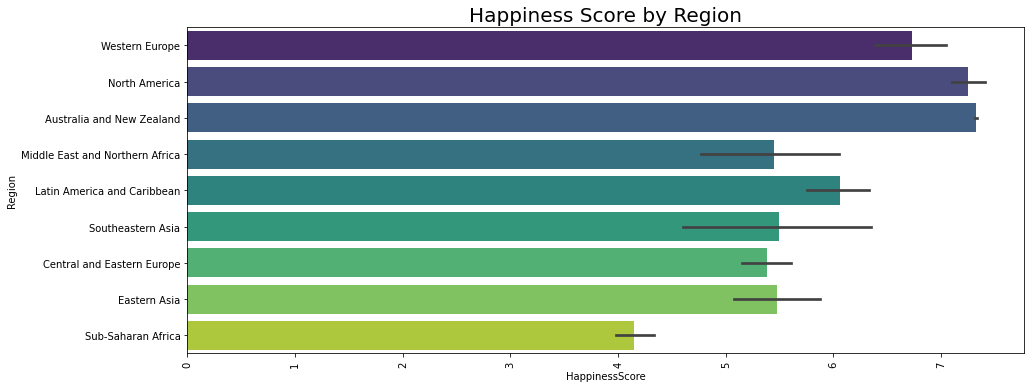

In [133]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='HappinessScore',y= 'Region',data = df, palette = 'viridis')
plt.title('Happiness Score by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Australians, New Zealanders and North Americans are the Happiest people, while Sub- Saharan Africans along with Central and Eastern Europe are the least happy people.

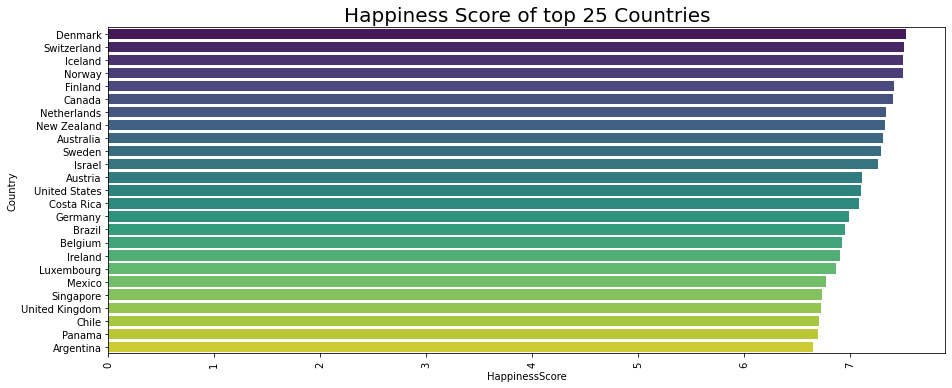

In [134]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='HappinessScore',y= 'Country',data = df.nlargest(25,'HappinessScore'), palette = 'viridis')
plt.title('Happiness Score of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Denmark is the Happiest Country.** It can be seen that a lot of American and European Countries are in the top 25 list. Countries all over the worls are represented in the list **except African Countries.**

## Analysing with respect to GDP per Capita

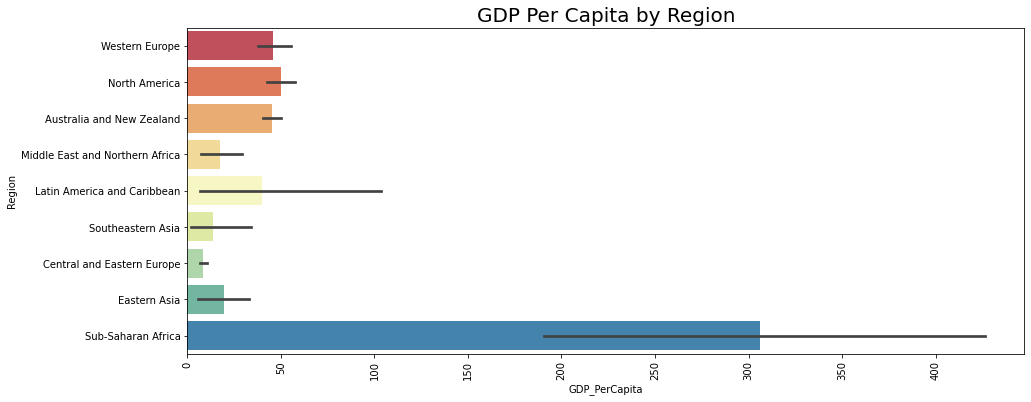

In [135]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='GDP_PerCapita',y= 'Region',data = df, palette = 'Spectral')
plt.title('GDP Per Capita by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Did not expect to see Sub Saharan Africa at the top of the list.

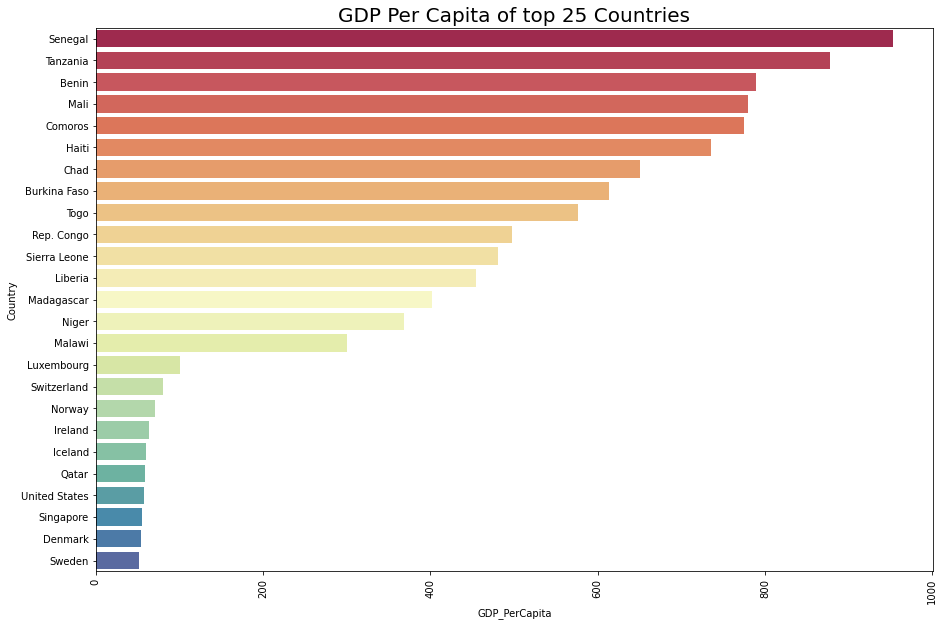

In [136]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='GDP_PerCapita',y= 'Country',data = df.nlargest(25,'GDP_PerCapita'), palette = 'Spectral')
plt.title('GDP Per Capita of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


There definitely seems to be something wrong with the GDP data for some of the countries in the dataset. A quick Google search showed me that Liberia does not have a higher GDP Per Capita than Sweden.

**With this in mind it makes no sense to look too much into the GDP Per Capita variable.**

## Human Development Index(HDI)

Text(0.5, 1.0, 'Density Plot of the Human Development Index')

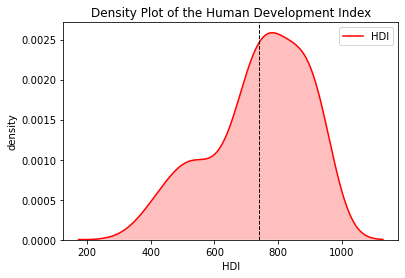

In [137]:
sns.kdeplot(df['HDI'], color='r', shade=True, Label='HDI') 
plt.axvline(df['HDI'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('HDI')
plt.ylabel('density')
plt.title('Density Plot of the Human Development Index')

Most of the plots have a High HDI than the mean value.

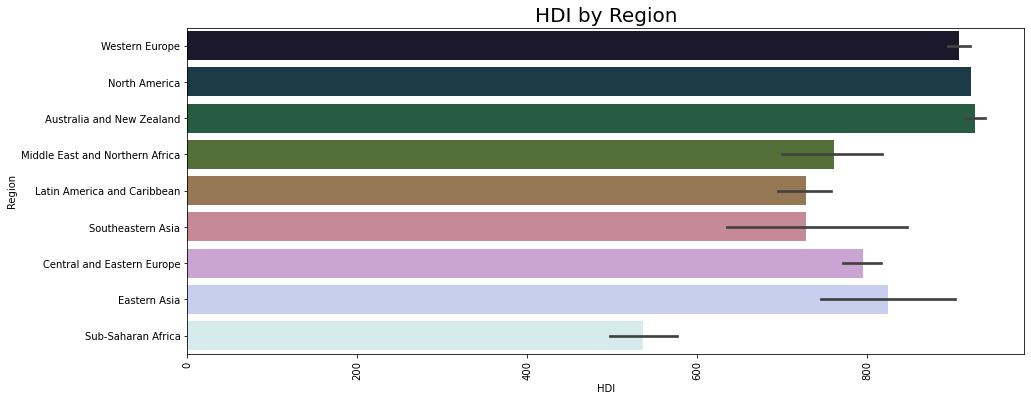

In [138]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='HDI',y= 'Region',data = df, palette = 'cubehelix')
plt.title('HDI by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Australia, New Zealand, North America and Western Europe has the highest HDI. Sub-Saharan Africa haas the lowest HDI.
This plot is very similar to the Happiness Score plot we saw earlier.

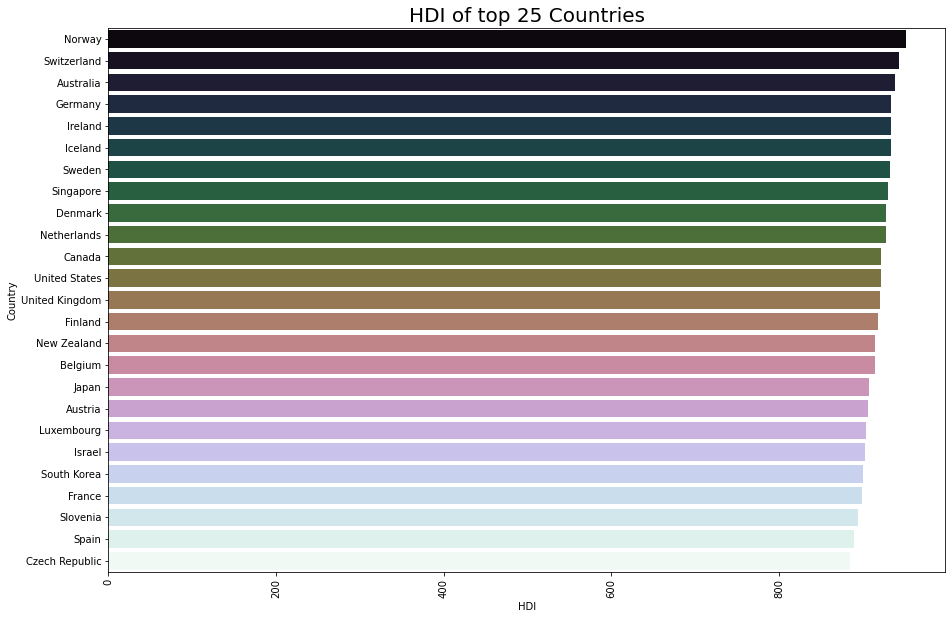

In [139]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='HDI',y= 'Country',data = df.nlargest(25,'HDI'), palette = 'cubehelix')
plt.title('HDI of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Norway sits at the top of the list. There are no South American and African Countries in the the top 25.

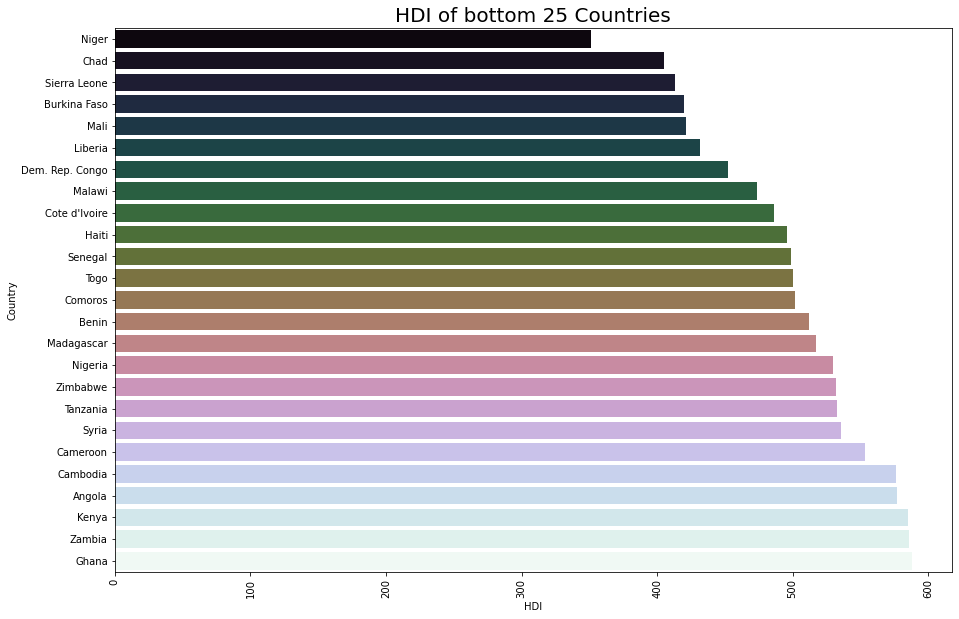

In [140]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='HDI',y= 'Country',data = df.nsmallest(25,'HDI'), palette = 'cubehelix')
plt.title('HDI of bottom 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Niger sits at the bottom. Norway at the top is almost 3 times the Niger value.
Mostly African countries in the bottom 25. 

## Beer Per Capita

Text(0.5, 1.0, 'Density Plot of the Beer per Capita')

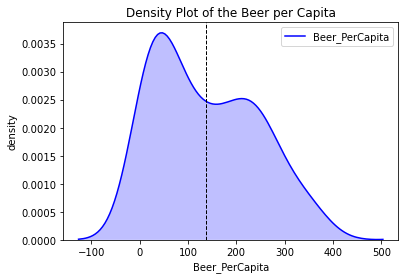

In [141]:
sns.kdeplot(df['Beer_PerCapita'], color='b', shade=True, Label='Beer_PerCapita') 
plt.axvline(df['Beer_PerCapita'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Beer_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Beer per Capita')

The plot shows that most of the countries in the data have a Beer Per Capita value greater than the mean.

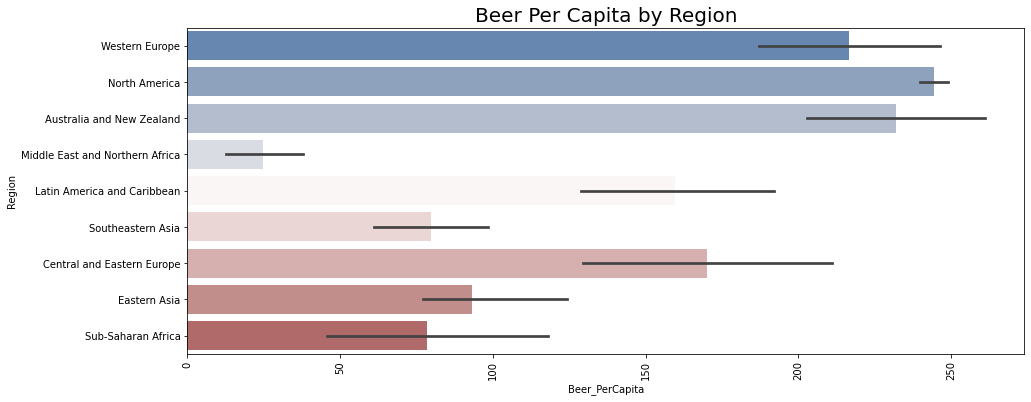

In [142]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='Beer_PerCapita',y= 'Region',data = df, palette = 'vlag')
plt.title('Beer Per Capita by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

North America, Australia and New Zealand are yet again at top for this category also. **There is a fairly big drop in rest of the regions for this category.**
Middle East and Northern Afrrica have the least consumption of Beer.

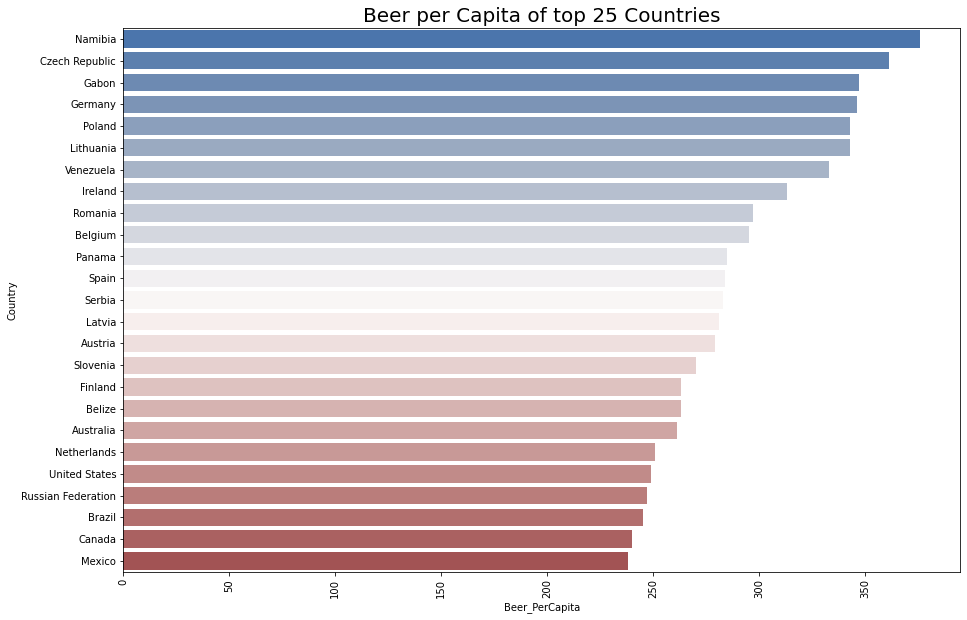

In [143]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Beer_PerCapita',y= 'Country',data = df.nlargest(25,'Beer_PerCapita'), palette = 'vlag')
plt.title('Beer per Capita of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Surprisingly here, for the first time, an African Country is on the top. 


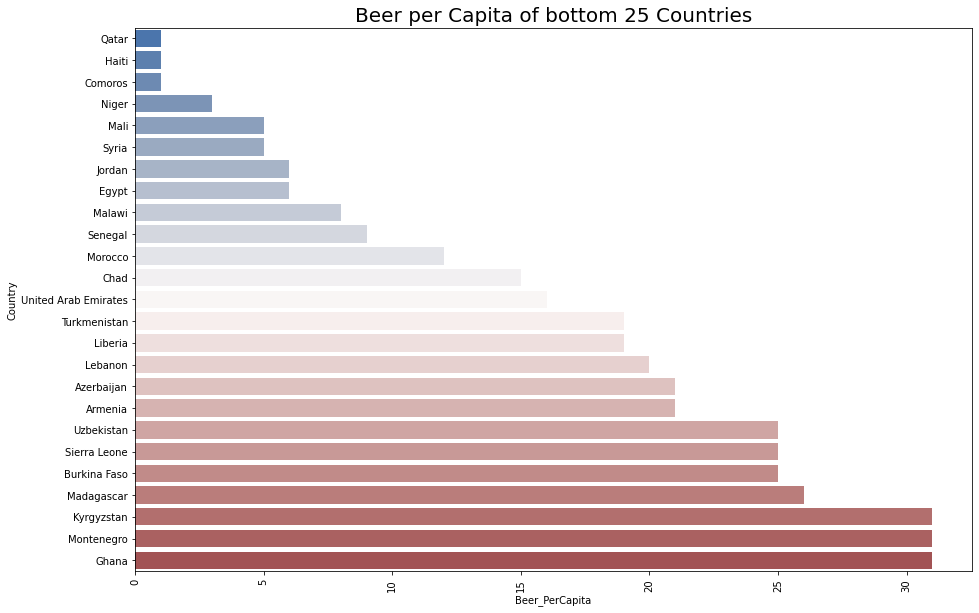

In [144]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Beer_PerCapita',y= 'Country',data = df.nsmallest(25,'Beer_PerCapita'), palette = 'vlag')
plt.title('Beer per Capita of bottom 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Qatar,Haiti and Comoros turns out to sit at the bottom.
There are a lot of Middle Eastern and North African countries which matches up to the Regions plot we saw earlier.

## Spirit Per Capita

Text(0.5, 1.0, 'Density Plot of the Spirit per Capita')

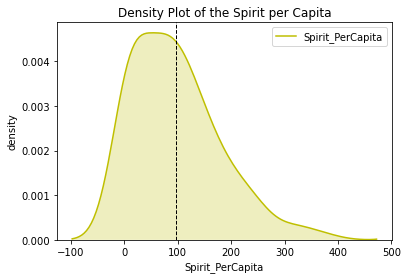

In [145]:
sns.kdeplot(df['Spirit_PerCapita'], color='y', shade=True, Label='Spirit_PerCapita') 
plt.axvline(df['Spirit_PerCapita'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Spirit_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Spirit per Capita')

The plot shows that most of the countries in the data have a Spirit Per Capita value greater than the mean.

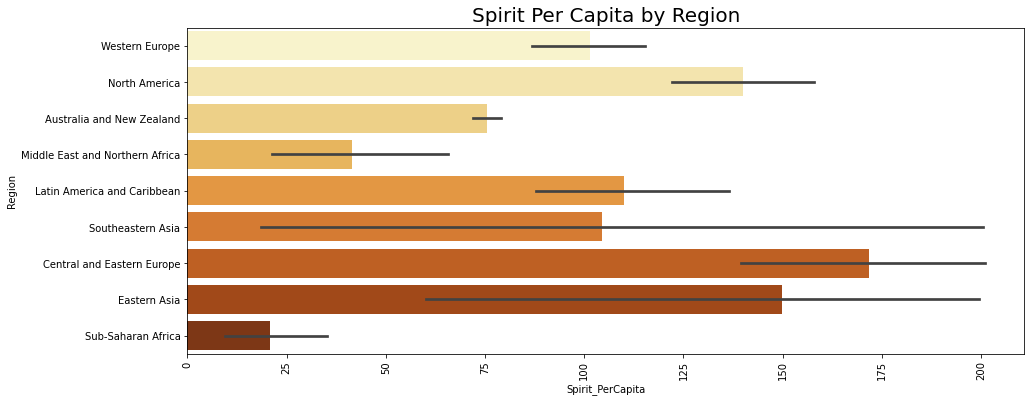

In [146]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='Spirit_PerCapita',y= 'Region',data = df, palette = 'YlOrBr')
plt.title('Spirit Per Capita by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Central and Eastern Europe sits at the top with Sub-Saharan Africa at the bottom..**


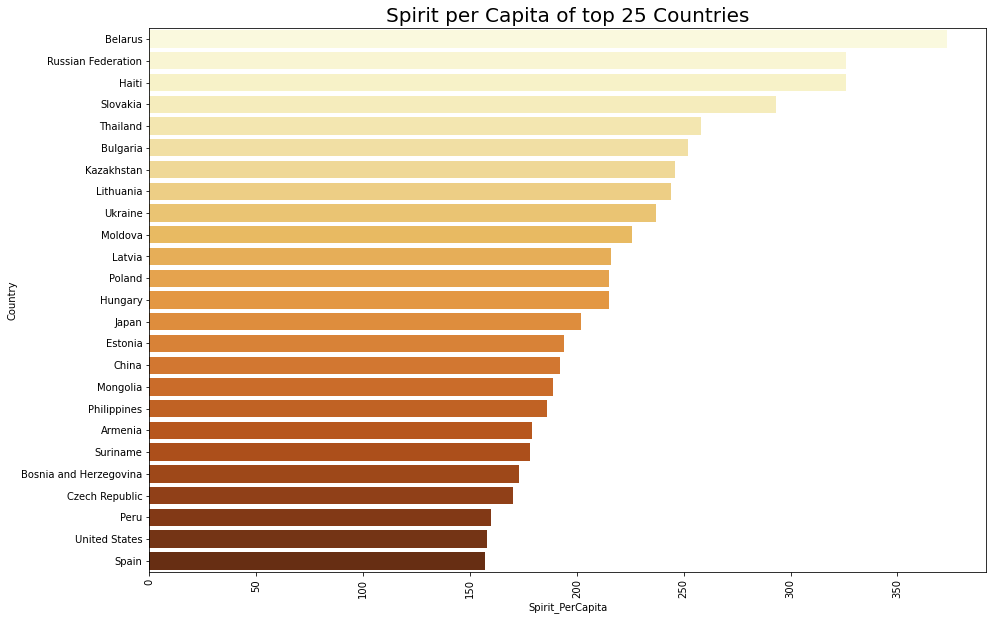

In [147]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Spirit_PerCapita',y= 'Country',data = df.nlargest(25,'Spirit_PerCapita'), palette = 'YlOrBr')
plt.title('Spirit per Capita of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**The nation of Belarus is out ahead of every other country by a long shot when it come to the Spirit Per Capita. Russia and Haiti and tied for second place** there is a drop to the rest of the countries that follow.

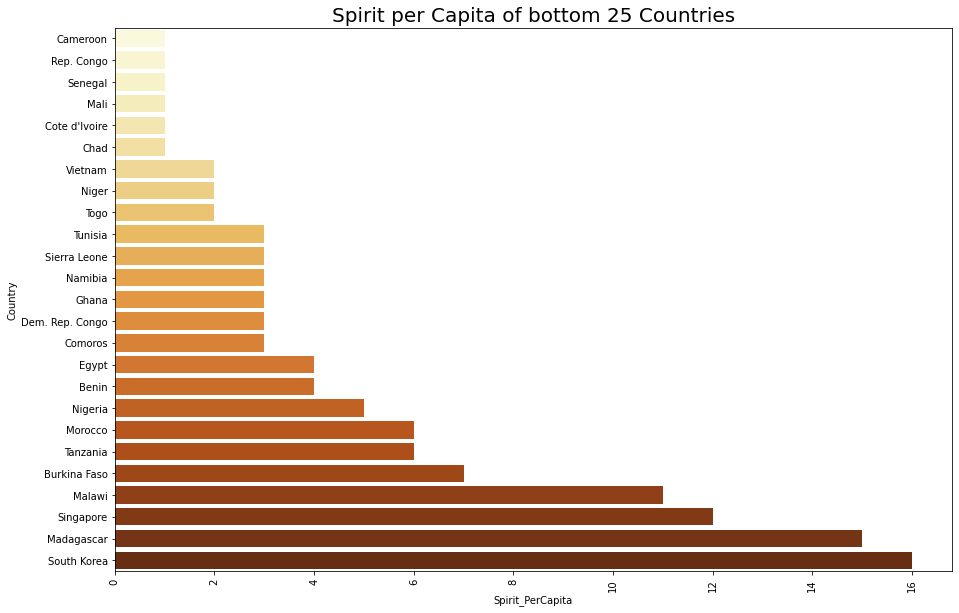

In [148]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Spirit_PerCapita',y= 'Country',data = df.nsmallest(25,'Spirit_PerCapita'), palette = 'YlOrBr')
plt.title('Spirit per Capita of bottom 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Cameroon sits at the bottom.
Looking at the bottom 25 countries it seems as if Spirits might not be very popular in Sub-Saharan Africa

## Wine Per Capita

Text(0.5, 1.0, 'Density Plot of the Wine per Capita')

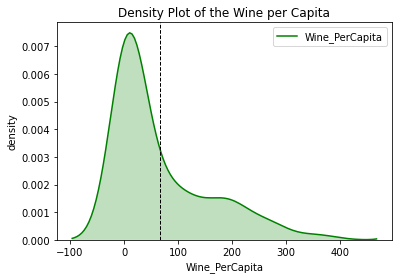

In [149]:
sns.kdeplot(df['Wine_PerCapita'], color = 'g', shade = True, Label = 'Wine_PerCapita')
plt.axvline(df['Wine_PerCapita'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Wine_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Wine per Capita')

The plot shows that most of the countries in the data have a Wine Per Capita value greater than the mean.

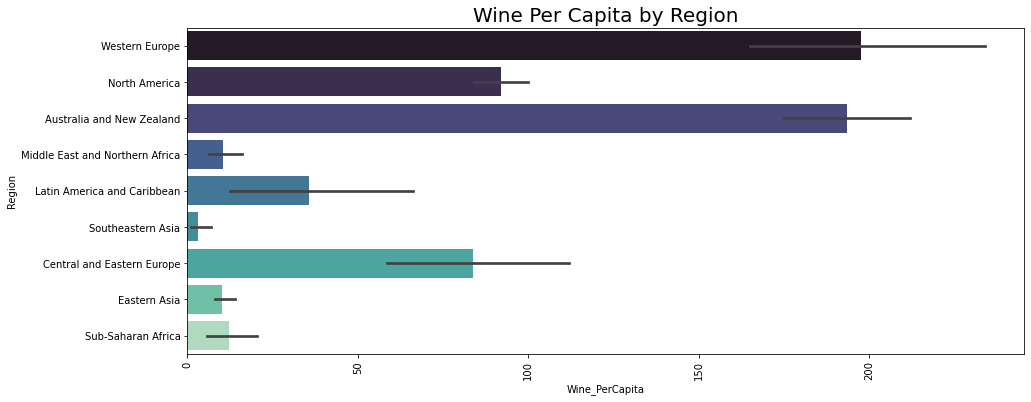

In [150]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='Wine_PerCapita',y= 'Region',data = df, palette = 'mako')
plt.title('Wine Per Capita by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Western Europe, Australia and New Zealand, North America sit at the top.
Asia and Africa do not fancy Wine so much.


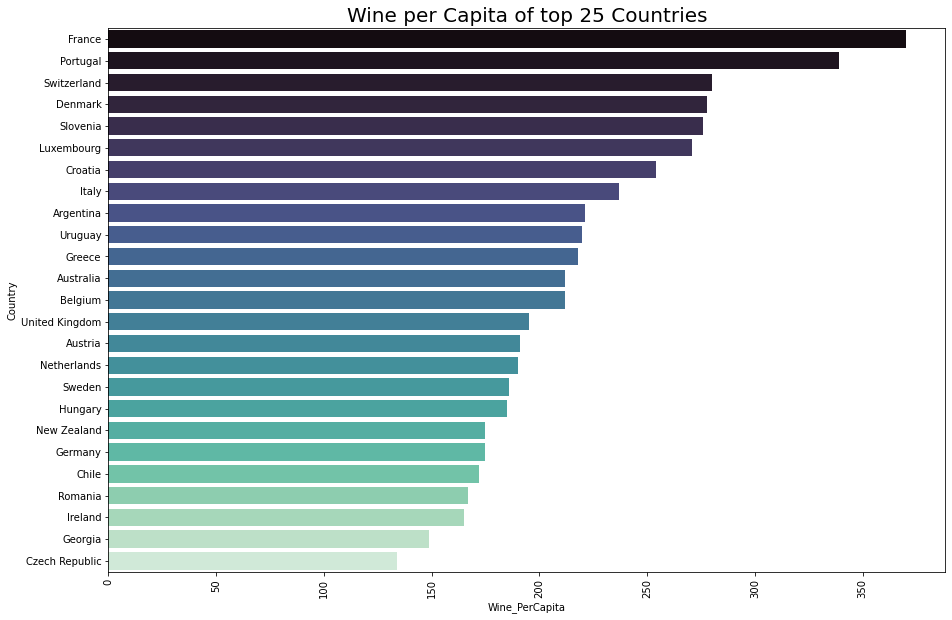

In [151]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Wine_PerCapita',y= 'Country',data = df.nlargest(25,'Wine_PerCapita'), palette = 'mako')
plt.title('Wine per Capita of top 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**No surprise to see France with the highest Wine Per Capita by a big margin.**

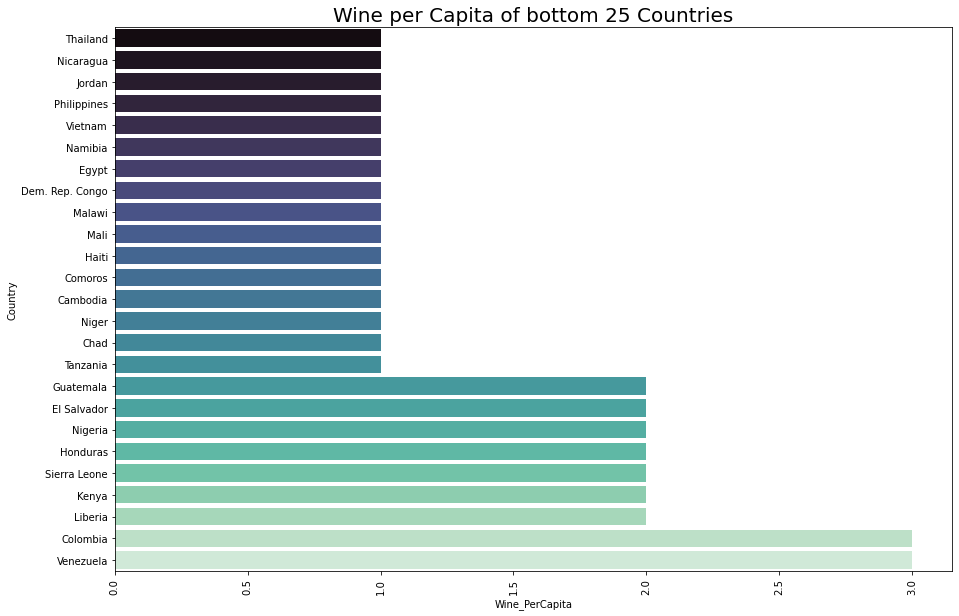

In [152]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Wine_PerCapita',y= 'Country',data = df.nsmallest(25,'Wine_PerCapita'), palette = 'mako')
plt.title('Wine per Capita of bottom 25 Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

The bottom 16 countries have the same type of consumption and are a mix of Asian, Latin American and Carribean, African countries, just as we saw in the Regions graph.

## Wine per Capita vs GDP per Capita

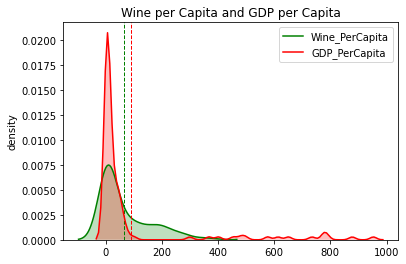

In [191]:
sns.kdeplot(df['Wine_PerCapita'], color = 'g', shade = True, Label = 'Wine_PerCapita')
plt.axvline(df['Wine_PerCapita'].mean(), color='g', linestyle='dashed', linewidth=1)
sns.kdeplot(df['GDP_PerCapita'], color = 'r', shade = True, Label = 'GDP_PerCapita')
plt.axvline(df['GDP_PerCapita'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.ylabel('density')
plt.title('Wine per Capita and GDP per Capita', fontsize =12)
plt.show()

GDP_PerCapita has a much higher value than GDP per Capita. The red dotted line represents the mean value of GDP_PerCapita and green dotted line represents themean value of Wine_PerCapita. The mean value of GDP_PerCapita is more. 
Also the range of GDP_PerCapita is obviously more than the Wine_PerCapita.

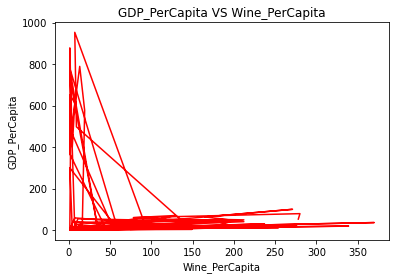

In [190]:
plt.plot(df['Wine_PerCapita'], df['GDP_PerCapita'], color = 'r')
plt.xlabel('Wine_PerCapita')
plt.ylabel('GDP_PerCapita')
plt.title('GDP_PerCapita VS Wine_PerCapita', fontsize = 12)
plt.show()

GDP_PerCapita is falling w.r.t Wine_PerCapita.

**wine = 1/gdp**

## Prediction Models

In [153]:
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


Hemisphere, Region and Country are not important features for our model so its better to drop these features to avoid overfitting.

In [154]:
df = df.drop(['Country', 'Hemisphere', 'Region'], axis = 1)

In [155]:
df.head()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,7.526,928,53.579,224,81,278
1,7.509,943,79.866,185,100,280
2,7.501,933,60.530,233,61,78
3,7.498,951,70.890,169,71,129
4,7.413,918,43.433,263,133,97


In [157]:
df.columns

Index(['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita',
       'Spirit_PerCapita', 'Wine_PerCapita'],
      dtype='object')

In [158]:
X = df[['HDI', 'GDP_PerCapita', 'Beer_PerCapita',
       'Spirit_PerCapita', 'Wine_PerCapita']]
y = df['HappinessScore']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [160]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.6200948858486277

In [162]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor_forest.fit(X_train, y_train)
regressor_forest.score(X_test,y_test)

0.7126522229734604

In [164]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.5759596051300007

In [170]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1)
rid.fit(X_train,y_train)
rid.score(X_test,y_test)

0.620095041013023

In [172]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()
boost.fit(X_train,y_train)
boost.score(X_test,y_test)

0.7559527435208753

In [174]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.7670999241288956

76% is the highest accuracy achieved after using different algorithms.